# Patient treatment Classification

# Context

In hospitals, medical treatments and surgeries can be categorized into inpatient and outpatient procedures. For patients, it is important to understand the difference between these two types of care, because they impact the length of a patient’s stay in a medical facility and the cost of a procedure. 


Inpatient Care (Incare Patient) and Outpatient Care (Outcare Patient)

The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.

Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.

Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised. [source of information: pbmhealth]


# Problem Statement

In today’s world of automation, the skills and knowledge of a person could be utilized at the best places possible by automating tasks wherever possible. As a part of the hospital automation system, one can build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.

# Objective

Build a machine learning model to predict if the patient should be classified as in care or out care based on the patient's laboratory test result.

# Evaluation metric - F1 score


# Source: https://dphi.tech/practice/challenge/43


In [37]:
!pip install mixed_naive_bayes


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from mixed_naive_bayes import MixedNB


In [4]:
patient_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/testing_set_label.csv')

In [77]:
patient_data['SEX']=patient_data['SEX'].apply(lambda x: 0 if x=='F' else 1).astype('int64')
test_data['SEX']=test_data['SEX'].apply(lambda x: 0 if x=='F' else 1).astype('int64')

# General dataset information

In [6]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   int64  
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 284.5 KB


In [7]:
patient_data.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.526745,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.499360,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,1.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000,1.000000


In [76]:
patient_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


# Dataset information


Name / Data Type / Value Sample/ Description

----------------------------- 

HAEMATOCRIT /Continuous /35.1 / Patient laboratory test result of haematocrit

HAEMOGLOBINS/Continuous/11.8 / Patient laboratory test result of haemoglobins

ERYTHROCYTE/Continuous/4.65 /  Patient laboratory test result of erythrocyte

LEUCOCYTE /Continuous /6.3 / Patient laboratory test result of leucocyte

THROMBOCYTE/Continuous/310/ Patient laboratory test result of thrombocyte

MCH/Continuous /25.4/ Patient laboratory test result of MCH

MCHC/Continuous/33.6/ Patient laboratory test result of MCHC

MCV/Continuous /75.5/ Patient laboratory test result of MCV

AGE/Continuous/12/ Patient age

SEX/Nominal – Binary/F/ Patient gender

SOURCE/Nominal/ {1,0}/The class target 1.= in care patient, 0 = out care patient

In [15]:
patient_data.shape

(3309, 11)

# Histogram of the complete dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2de2301400>,
      dtype=object)

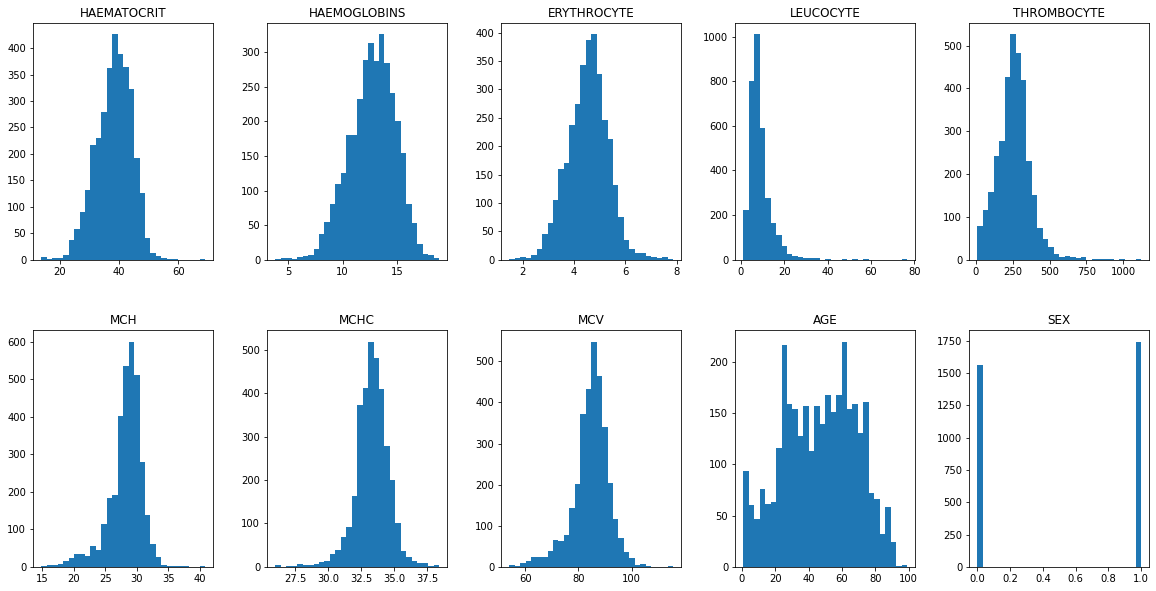

In [16]:
patient_data.iloc[:,:-1].hist(figsize=(20,10), grid=False, layout=(2, 5), bins = 30)

# LEUCOCYTE is bit of right skewed
# All features are not normaly distributed, but close to normal distributed
# Each features are in different scale
# Sex is a categorical column with 2 values (Male and Female)

Text(0.5, 1.0, 'Class distribution')

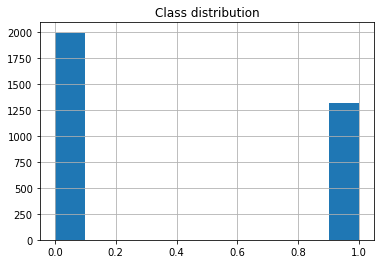

In [33]:
patient_data['SOURCE'].hist()
plt.title('Class distribution')

There is a slight class imbalnce between Class-0 and Class-1 which needs to be addressed while model building

# Outlier detection

HAEMATOCRIT        AxesSubplot(0.125,0.536818;0.133621x0.343182)
HAEMOGLOBINS    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
ERYTHROCYTE      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
LEUCOCYTE       AxesSubplot(0.606034,0.536818;0.133621x0.343182)
THROMBOCYTE     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
MCH                   AxesSubplot(0.125,0.125;0.133621x0.343182)
MCHC               AxesSubplot(0.285345,0.125;0.133621x0.343182)
MCV                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
AGE                AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

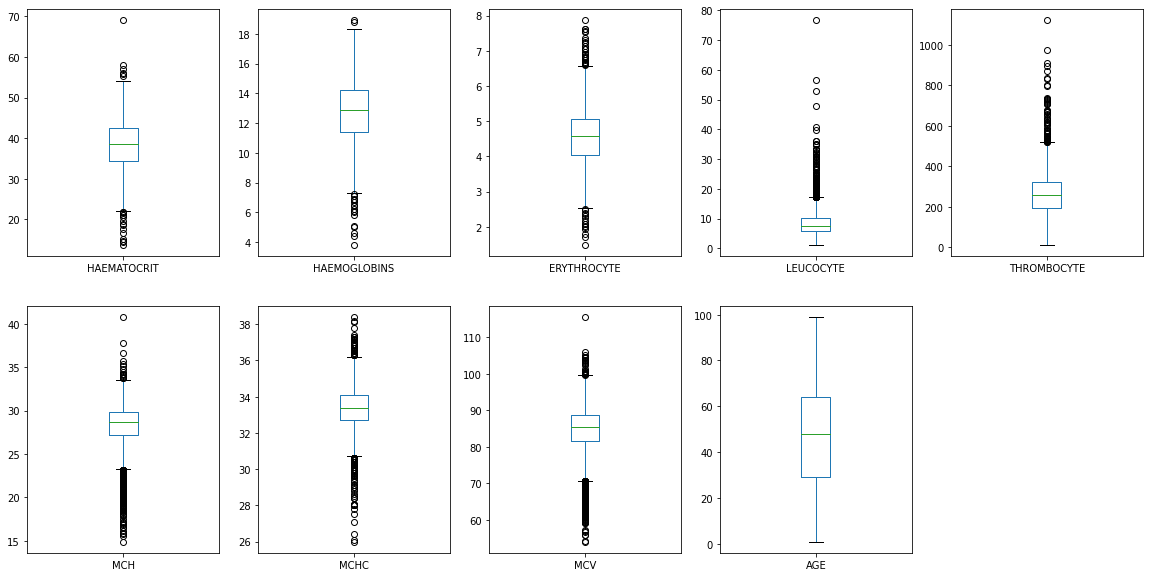

In [22]:
patient_data.iloc[:,:-2].plot(kind='box',figsize=(20,10), subplots=True,grid=False, layout=(2, 5))

Except Age feature, all are having outliers, while selecting machine learning algorithm this should be taken into consideration

# Correlation of the dataset

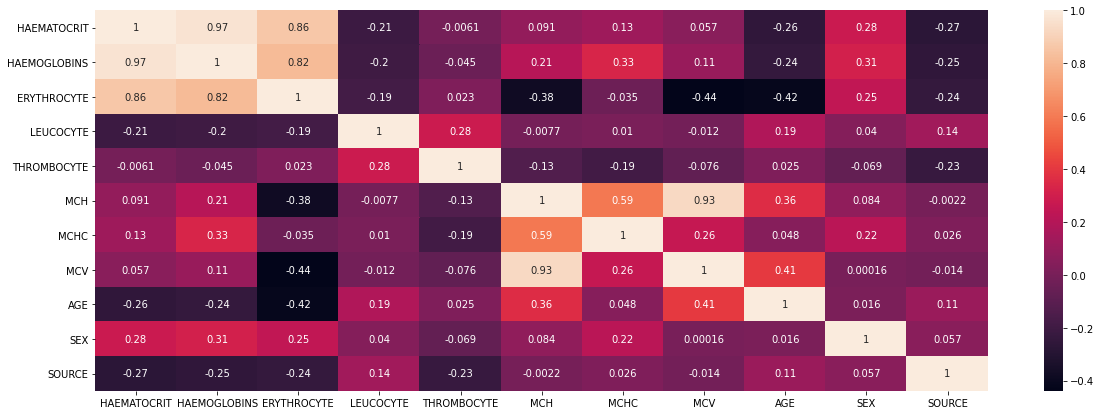

In [23]:
plt.figure(figsize=(20,7))
sns.heatmap(patient_data.corr(), annot=True)

In [24]:
patient_data.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE are highly correlated, we can use either one or two of the features for model building

MCH, MCV are highly correlated we can use either one of the features for model building

In [27]:
X=patient_data.drop(['SOURCE','HAEMATOCRIT','MCH'],axis=1)
y=patient_data['SOURCE']
X_test=test_data.drop(['HAEMATOCRIT','MCH'],axis=1)

In [36]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,stratify=y_train,test_size=0.2,random_state=100)

In [68]:
def train_test(X_train,y_train,X_valid,y_valid=None,class_weight=None,train=True):
  #class_weight={0:1,1:1.05}
  # Lgb model
  model_lgb=lgb.LGBMClassifier(random_state=42,class_weight=class_weight)
  # SVM model
  svm_model=SVC(class_weight=class_weight,random_state=50)
  sc=StandardScaler()
  #Logistic regression model
  log_model=LogisticRegression(class_weight=class_weight,random_state=50)
  sc_1=StandardScaler()

  # Naive bayes
  model_mnb=MixedNB(categorical_features=[7])

  # Random forest classifier
  model_rf=RandomForestClassifier(class_weight=class_weight,random_state=70,n_estimators=1000)

  # Adaboost
  model_ada=AdaBoostClassifier(base_estimator=lgb.LGBMClassifier(class_weight=class_weight))

  #xgboost
  model_xgb=xgboost.XGBClassifier(class_weight=class_weight,random_state=40)

  #SVC
  pipe=Pipeline([('standardscaler',sc),('svc',svm_model)])
  
  # Log classifier
  pipe_1=Pipeline([('standardscaler',sc_1),('log',log_model)])
 
  try:
   pipe.fit(X_train.values,y_train.values)
   pipe_1.fit(X_train.values,y_train.values)
   model_mnb.fit(X_train.values,y_train.values)
  except:
   pipe.fit(X_train,y_train)
   pipe_1.fit(X_train,y_train)
   model_mnb.fit(X_train,y_train)
  model_rf.fit(X_train,y_train)

  model_ada.fit(X_train,y_train)

  model_xgb.fit(X_train,y_train)

  model_lgb.fit(X_train,y_train)

  test_value_lgb=model_lgb.predict(X_valid)
  test_value_ada=model_ada.predict(X_valid)
  test_value_rf=model_rf.predict(X_valid)
  test_value_xgb=model_xgb.predict(X_valid)
  test_value_mnb=model_mnb.predict(X_valid)
  test_value_svm=pipe.predict(X_valid)
  test_value_log=pipe_1.predict(X_valid)
  df_result=pd.DataFrame()
  if train:
    
    df_result['accuracy']=np.zeros((7,),dtype=float)
    df_result['f1_score']=0.0
    df_result.iloc[0,0]=accuracy_score(y_valid,test_value_rf)
    df_result.iloc[1,0]=accuracy_score(y_valid,test_value_svm)
    df_result.iloc[2,0]=accuracy_score(y_valid,test_value_lgb)
    df_result.iloc[3,0]=accuracy_score(y_valid,test_value_ada)
    df_result.iloc[4,0]=accuracy_score(y_valid,test_value_xgb)
    df_result.iloc[5,0]=accuracy_score(y_valid,test_value_log)
    df_result.iloc[6,0]=accuracy_score(y_valid,test_value_mnb)

    df_result.iloc[0,1]=f1_score(y_valid,test_value_rf)
    df_result.iloc[1,1]=f1_score(y_valid,test_value_svm)
    df_result.iloc[2,1]=f1_score(y_valid,test_value_lgb)
    df_result.iloc[3,1]=f1_score(y_valid,test_value_ada)
    df_result.iloc[4,1]=f1_score(y_valid,test_value_xgb)
    df_result.iloc[5,1]=f1_score(y_valid,test_value_log)
    df_result.iloc[6,1]=f1_score(y_valid,test_value_mnb)

    df_result.index=['random_forest','svm','lgb','ada','xgb','log_reg','mn_bayes']
    df_result.columns=['accuracy','f1_score']
  else:
    df_result['rf']=test_value_rf
    df_result['svm']=test_value_svm
    df_result['lgb']=test_value_lgb
    df_result['ada']=test_value_ada
    df_result['xgb']=test_value_xgb
    df_result['log']=test_value_log
    df_result['mnb']=test_value_mnb



  return df_result


In [55]:
df_result=train_test(X_train,y_train,X_valid,y_valid,class_weight={0:1,1:2.05})

[2]


In [64]:
df_result.sort_values(by=['f1_score'],ascending=False,inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc88ee160>,
      dtype=object)

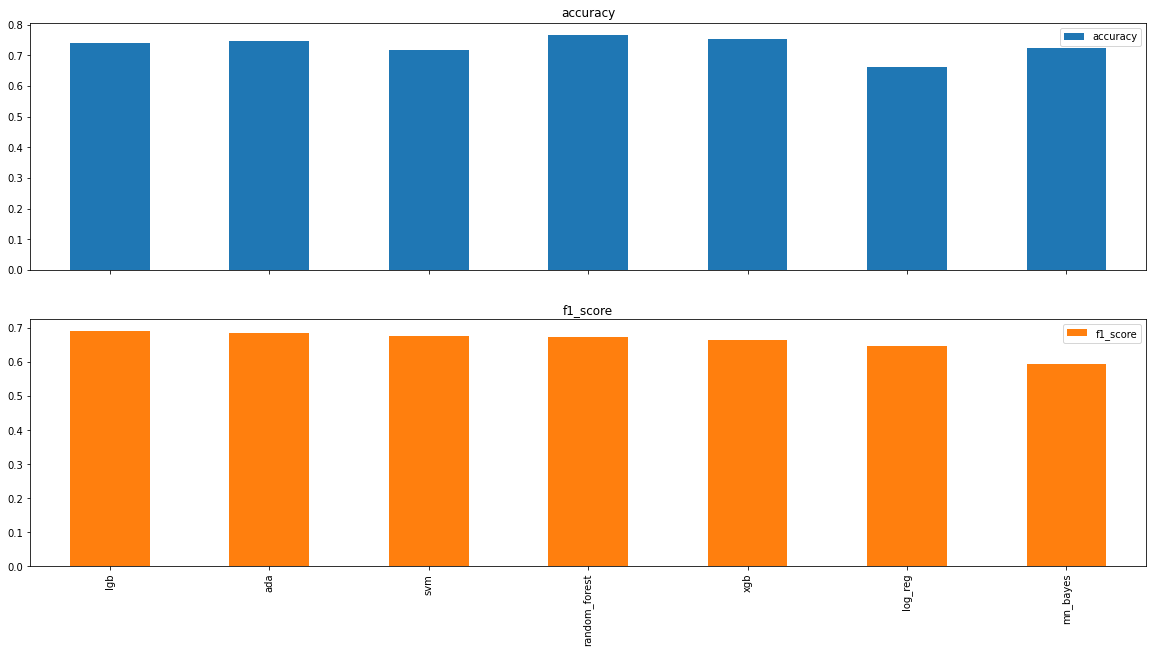

In [65]:
df_result.plot(kind='bar',subplots=True,figsize=(20,10), grid=False)

In [66]:
df_result

,accuracy,f1_score
lgb,0.741509,0.690745
ada,0.747170,0.683962
svm,0.716981,0.676724
random_forest,0.767925,0.673740
xgb,0.754717,0.663212
log_reg,0.662264,0.648330
mn_bayes,0.722642,0.592798


Lgb model gives high accuracy, followed by svm and randomforest

In [78]:
model_lgb=lgb.LGBMClassifier(class_weight={0:1,1:2.05},random_state=42)
model_lgb.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 2.05},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

# Feature importance of top model

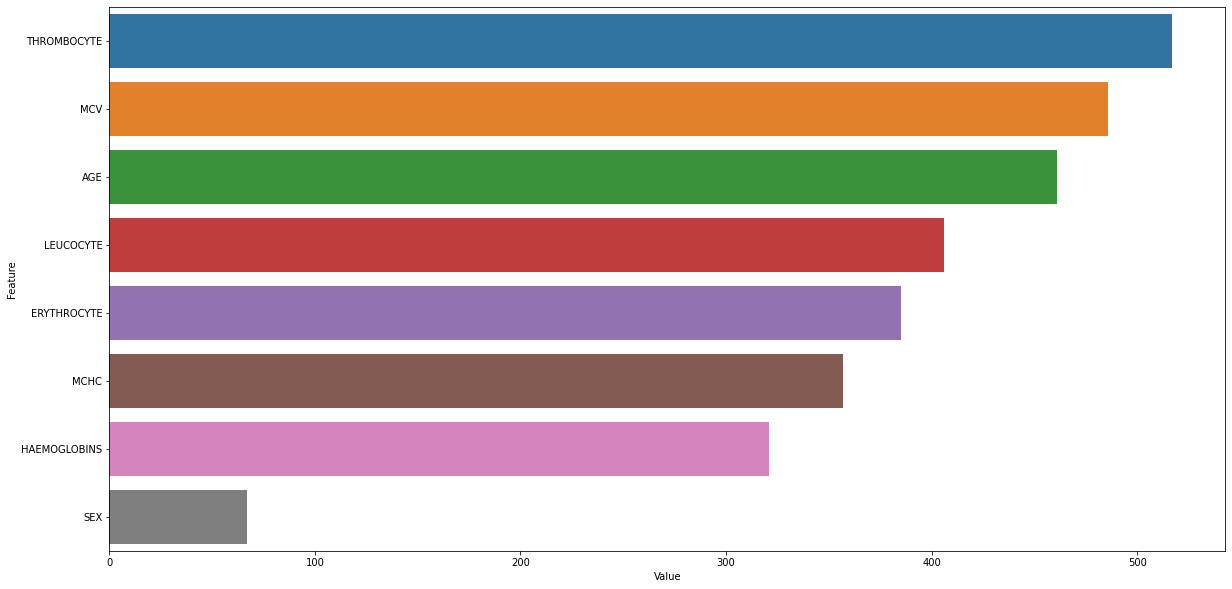

In [79]:
feature_imp = pd.DataFrame(sorted(zip(model_lgb.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

Features like Thrombocyte, MCV, Age contributes most to patient treatment classification while the feature sex contributes least.

In [69]:
df_result=train_test(X,y,X_test,class_weight={0:1,1:2.05},train=False)

[2]


# Create Blended output

In [71]:
df_result['prediction']=(3*df_result['lgb']+2*df_result['svm']+df_result['ada']+df_result['rf']+df_result['xgb']+df_result['mnb']+df_result['log'])/10

In [72]:
df_result['prediction']=df_result['prediction'].apply(lambda x: 0 if x< 0.4 else 1).astype('int64')

In [73]:
df_result['prediction'].value_counts()

0    570
1    533
Name: prediction, dtype: int64

# Submitting the results

In [74]:
res = pd.DataFrame(df_result['prediction'].copy()) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]


In [75]:
# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv',index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>